# Combining cranial and placodal
Concatenation of cranial and placodal datasets

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import sclitr as sl
import anndata as ad
import symphonypy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import scanpy.external as sce

/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: 

In [ ]:
DATA_PATH = "/placodes/data"

In [3]:
E11_placodes = sc.read_h5ad(f"{DATA_PATH}/anndatas_counts/new_data_reference_E11_placodal.h5ad")
E11_cranial = sc.read_h5ad(f"{DATA_PATH}/anndatas_counts/reference_E11_cranial.h5ad")

In [4]:
# Find the common var_names
common_vars = E11_placodes.var_names.intersection(E11_cranial.var_names)

# Subset both AnnData objects to only include the common var_names
adata1_subset = E11_placodes[:, common_vars]
adata2_subset = E11_cranial[:, common_vars]

# For each different column, create a new combined column in both objects
for col in ['E7.5:clones', 'E8.5:clones']:
    new_col_name = f"combined_{col}"
    
    # If column exists in first dataset
    if col in adata1_subset.obs.columns:
        adata1_subset.obs[new_col_name] = adata1_subset.obs[col]
        adata2_subset.obs[new_col_name] = "NA"
    
    # If column exists in second dataset
    if col in adata2_subset.obs.columns:
        adata2_subset.obs[new_col_name] = adata2_subset.obs[col]
        adata1_subset.obs[new_col_name] = "NA"

# Concatenate the subsetted AnnData objects
concatenated = ad.concat([adata1_subset, adata2_subset], axis=0)

/tmp/ipykernel_19045/1264853375.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1_subset.obs[new_col_name] = adata1_subset.obs[col]
/tmp/ipykernel_19045/1264853375.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2_subset.obs[new_col_name] = "NA"


In [5]:
concatenated.obs

,batch,sample_id,location,devtime,plasmids,injection,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,combined_E7.5:clones,combined_E8.5:clones
112623_E11_Lens:AAACCCACAAGTCCCG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4365,12813.0,156.0,1.217513,0.086420,NA,NA
112623_E11_Lens:AAACCCACAATGCAGG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,3625,10062.0,133.0,1.321805,0.008831,NA,NA
112623_E11_Lens:AAACCCACAATTTCGG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4351,11907.0,85.0,0.713866,0.098490,NA,NA
112623_E11_Lens:AAACCCACACTGATTG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4436,13493.0,105.0,0.778181,0.016830,injection31:clone_0,NA
112623_E11_Lens:AAACCCAGTCGCCACA,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4701,14985.0,163.0,1.087754,0.007519,injection31:clone_1,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112623_E11_cranial2:TTTGTTGGTCACCGAC,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,4836,20426.0,99.0,0.484676,0.011793,NA,injection32:clone_1303
112623_E11_cranial2:TTTGTTGGTGTGCTTA,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,4508,14379.0,108.0,0.751095,0.036779,NA,injection32:clone_35
112623_E11_cranial2:TTTGTTGGTTTGGGAG,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,4781,15406.0,201.0,1.304686,0.039216,NA,injection32:clone_2157
112623_E11_cranial2:TTTGTTGTCCATCAGA,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,3872,10117.0,114.0,1.126816,0.007198,NA,injection32:clone_714


In [6]:
# Merge the two clonal id attributes
concatenated.obs["clone_id"] = concatenated.obs["combined_E7.5:clones"].astype(str)
concatenated.obs.loc[concatenated.obs['clone_id'] == "NA", 'clone_id'] = concatenated.obs.loc[concatenated.obs['clone_id'] == "NA", 'combined_E8.5:clones']

In [7]:
concatenated.obs

,batch,sample_id,location,devtime,plasmids,injection,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,combined_E7.5:clones,combined_E8.5:clones,clone_id
112623_E11_Lens:AAACCCACAAGTCCCG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4365,12813.0,156.0,1.217513,0.086420,NA,NA,NA
112623_E11_Lens:AAACCCACAATGCAGG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,3625,10062.0,133.0,1.321805,0.008831,NA,NA,NA
112623_E11_Lens:AAACCCACAATTTCGG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4351,11907.0,85.0,0.713866,0.098490,NA,NA,NA
112623_E11_Lens:AAACCCACACTGATTG,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4436,13493.0,105.0,0.778181,0.016830,injection31:clone_0,NA,injection31:clone_0
112623_E11_Lens:AAACCCAGTCGCCACA,injection31,112623_E11_Lens,lens,E11.5,pMR671,E7.5,4701,14985.0,163.0,1.087754,0.007519,injection31:clone_1,NA,injection31:clone_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112623_E11_cranial2:TTTGTTGGTCACCGAC,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,4836,20426.0,99.0,0.484676,0.011793,NA,injection32:clone_1303,injection32:clone_1303
112623_E11_cranial2:TTTGTTGGTGTGCTTA,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,4508,14379.0,108.0,0.751095,0.036779,NA,injection32:clone_35,injection32:clone_35
112623_E11_cranial2:TTTGTTGGTTTGGGAG,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,4781,15406.0,201.0,1.304686,0.039216,NA,injection32:clone_2157,injection32:clone_2157
112623_E11_cranial2:TTTGTTGTCCATCAGA,injection32,112623_E11_cranial2,lens,E11.5,pMR671,E8.5,3872,10117.0,114.0,1.126816,0.007198,NA,injection32:clone_714,injection32:clone_714


In [8]:
concatenated.shape

(171093, 56691)

In [ ]:
# Batch correction of the two datasets
concatenated.layers["counts"] = concatenated.X.copy()
sc.pp.filter_genes(concatenated, min_cells=5)
sc.pp.normalize_total(concatenated, target_sum=1e4)
sc.pp.log1p(concatenated)

sc.pp.highly_variable_genes(
    concatenated,
    flavor="seurat_v3",
    layer="counts",
    n_top_genes=5000,
    #batch_key="batch"
)

In [10]:
concatenated.raw = concatenated

concatenated = concatenated[:, concatenated.var.highly_variable]
sc.pp.scale(concatenated, max_value=10)
sc.pp.pca(concatenated, n_comps=30)

/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
sp.pp.harmony_integrate(concatenated, key="batch", max_iter_harmony=30, verbose=True)
sc.pp.neighbors(concatenated, n_neighbors=20, use_rep="X_pca_harmony")
sc.tl.umap(concatenated)

2025-04-07 16:27:14,133 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Harmony integration with harmonypy is preforming.


2025-04-07 16:27:40,777 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-04-07 16:27:43,346 - harmonypy - INFO - Iteration 1 of 30
2025-04-07 16:29:19,788 - harmonypy - INFO - Iteration 2 of 30
2025-04-07 16:30:42,269 - harmonypy - INFO - Iteration 3 of 30
2025-04-07 16:32:18,606 - harmonypy - INFO - Converged after 3 iterations
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
for resolution in [0.5, 1, 2, 3, 4]:
    sc.tl.leiden(concatenated, key_added=f"leiden_{resolution}", resolution=resolution)

/tmp/ipykernel_19045/4091919143.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(concatenated, key_added=f"leiden_{resolution}", resolution=resolution)


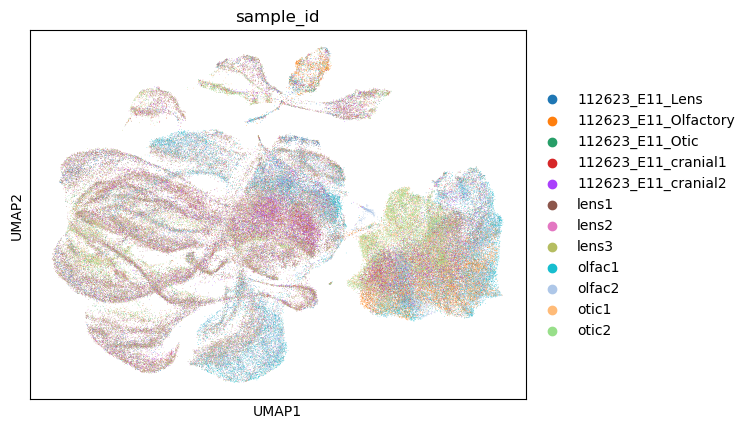

In [13]:
sc.pl.umap(concatenated, color="sample_id")

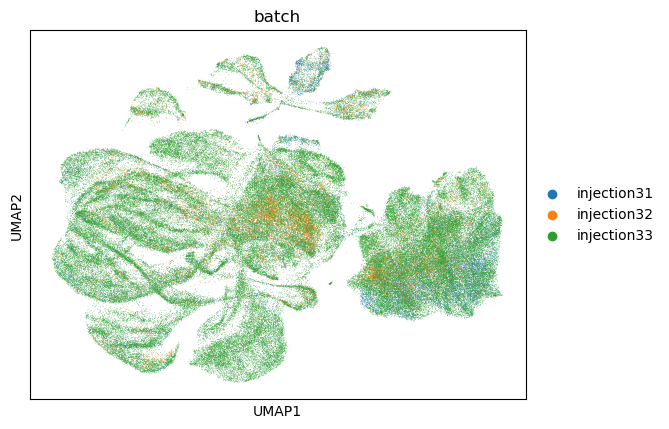

In [14]:
sc.pl.umap(concatenated, color="batch")

In [ ]:
# Save the concatenated dataset
concatenated.write_h5ad(f"{DATA_PATH}/anndatas/cranial_placodal_integrated.h5ad")